# ПРАКТИКУМ: ОБУЧЕНИЕ БЕЗ УЧИТЕЛЯ

    Практические задания для самостоятельной работы

     Цели практикума:,
    "- Освоить основные алгоритмы кластеризации",
    "- Научиться применять методы снижения размерности",
    "- Освоить техники обнаружения аномалий",
    "- Развить навыки интерпретации результатов",
    "- Понять критерии оценки качества",
    Структура работы:

1. Подготовка данных и EDA
2. Кластеризация (K-Means, Hierarchical, DBSCAN)
3. Снижение размерности (PCA, t-SNE)
4. Обнаружение аномалий
5. Анализ и интерпретация результатов


## БЛОК 1: Импорт библиотек и настройка окружения

In [1]:
# Основные библиотеки для работы с данными
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Основные библиотеки загружены")

Основные библиотеки загружены


In [2]:
# Библиотеки машинного обучения
from sklearn.datasets import make_blobs, make_circles, make_moons, load_wine, load_breast_cancer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Алгоритмы кластеризации
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Снижение размерности
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Обнаружение аномалий
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

# Метрики качества
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Иерархическая кластеризация
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

print("Библиотеки машинного обучения загружены")

Библиотеки машинного обучения загружены


## БЛОК 2: Подготовка и исследование данных

In [3]:
# ЗАДАЧА 2.1: Загрузка и первичный анализ данных
# Загрузите датасет Wine из sklearn и изучите его структуру

# ПОДСКАЗКА: Используйте load_wine() для загрузки данных
# ПОДСКАЗКА: Создайте DataFrame из data и target
# ПОДСКАЗКА: Изучите shape, info(), describe(), head()

# ВАШ КОД ЗДЕСЬ:


# ЗАДАНИЕ: Выведите основную информацию о датасете:
# - количество объектов и признаков
# - названия признаков
# - количество классов в целевой переменной
# - есть ли пропущенные значения

# ВАШ КОД ЗДЕСЬ:

# ЗАДАЧА 2.1: Загрузка и первичный анализ данных

from sklearn.datasets import load_wine
import pandas as pd

# --- Загрузка датасета ---
wine = load_wine()

# --- Создание DataFrame ---
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df["target"] = wine.target

# --- Просмотр первых строк ---
print("Первые 5 строк таблицы:")
print(df.head(), "\n")

# --- Размер датасета ---
print(f"Количество объектов (строк): {df.shape[0]}")
print(f"Количество признаков (столбцов, включая целевую переменную): {df.shape[1]}\n")

# --- Названия признаков ---
print("Названия признаков:")
print(wine.feature_names, "\n")

# --- Количество классов в целевой переменной ---
print("Количество классов в целевой переменной:")
print(df["target"].nunique())
print("Сами классы:", df["target"].unique(), "\n")

# --- Проверка на пропущенные значения ---
print("Проверка на пропущенные значения:")
print(df.isnull().sum(), "\n")

# --- Общая информация о данных ---
print("Информация о DataFrame:")
print(df.info(), "\n")

# --- Статистическое описание ---
print("Основная статистика по признакам:")
print(df.describe())


Первые 5 строк таблицы:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proli

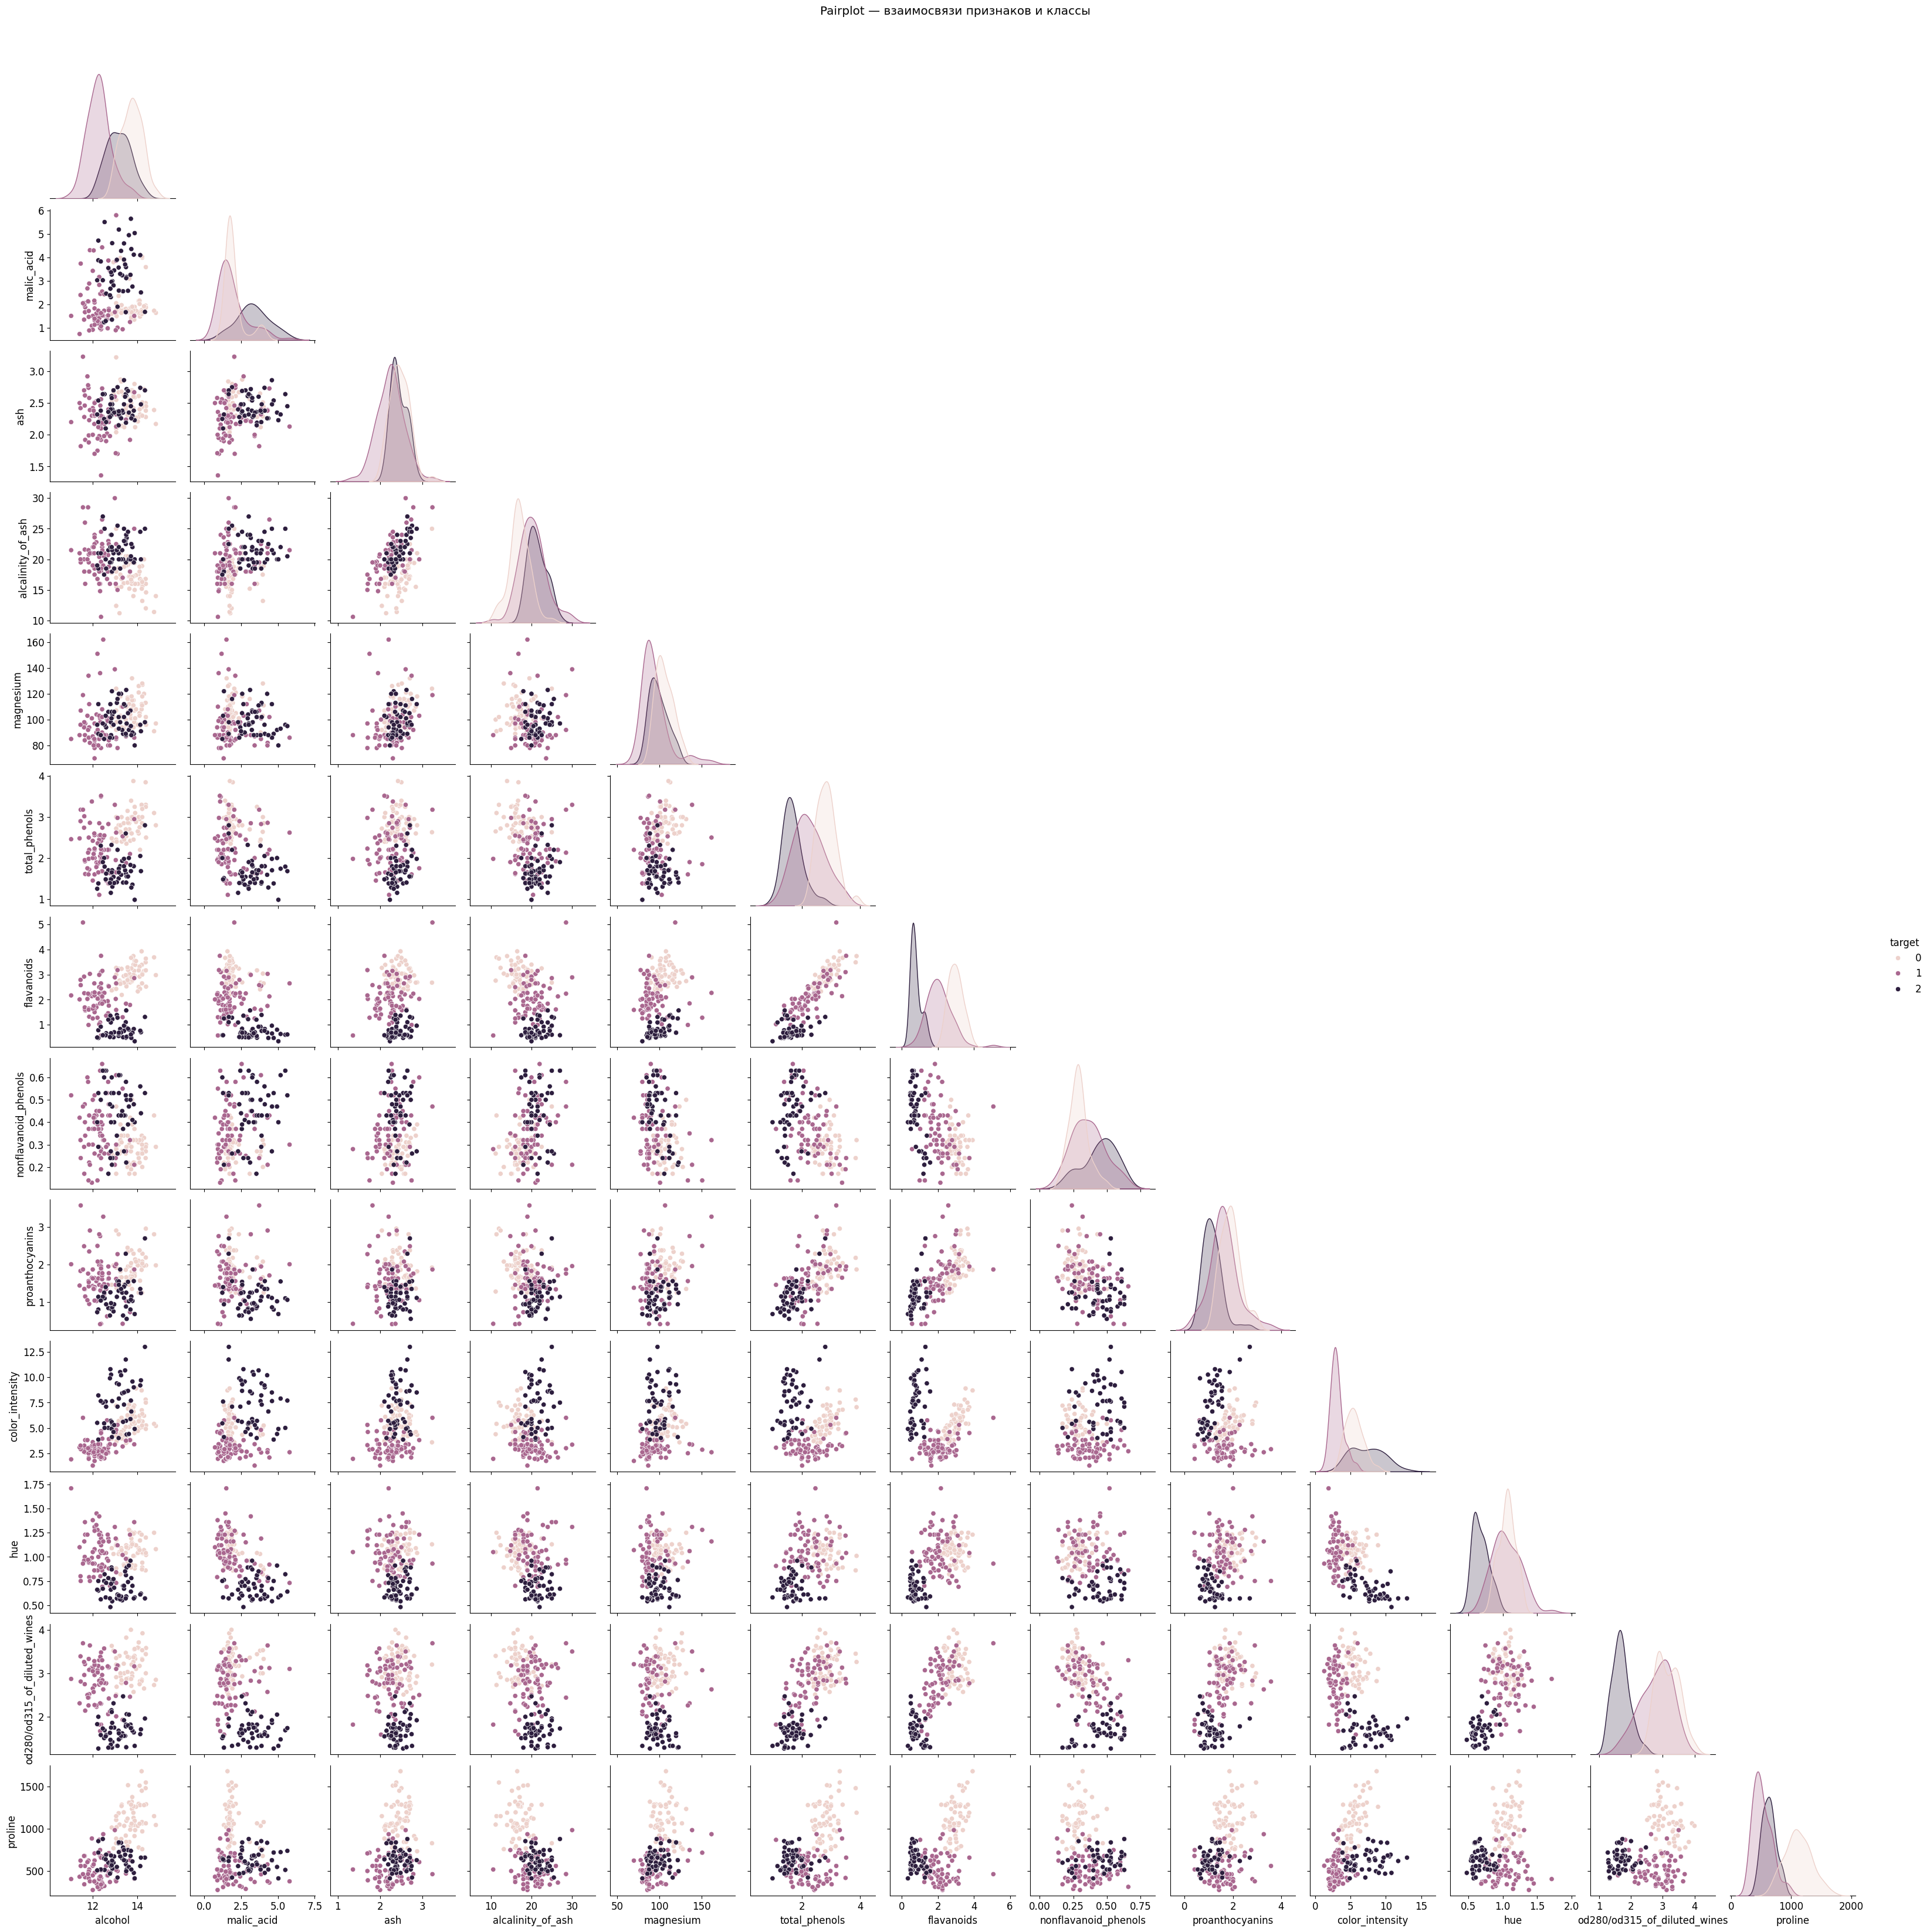

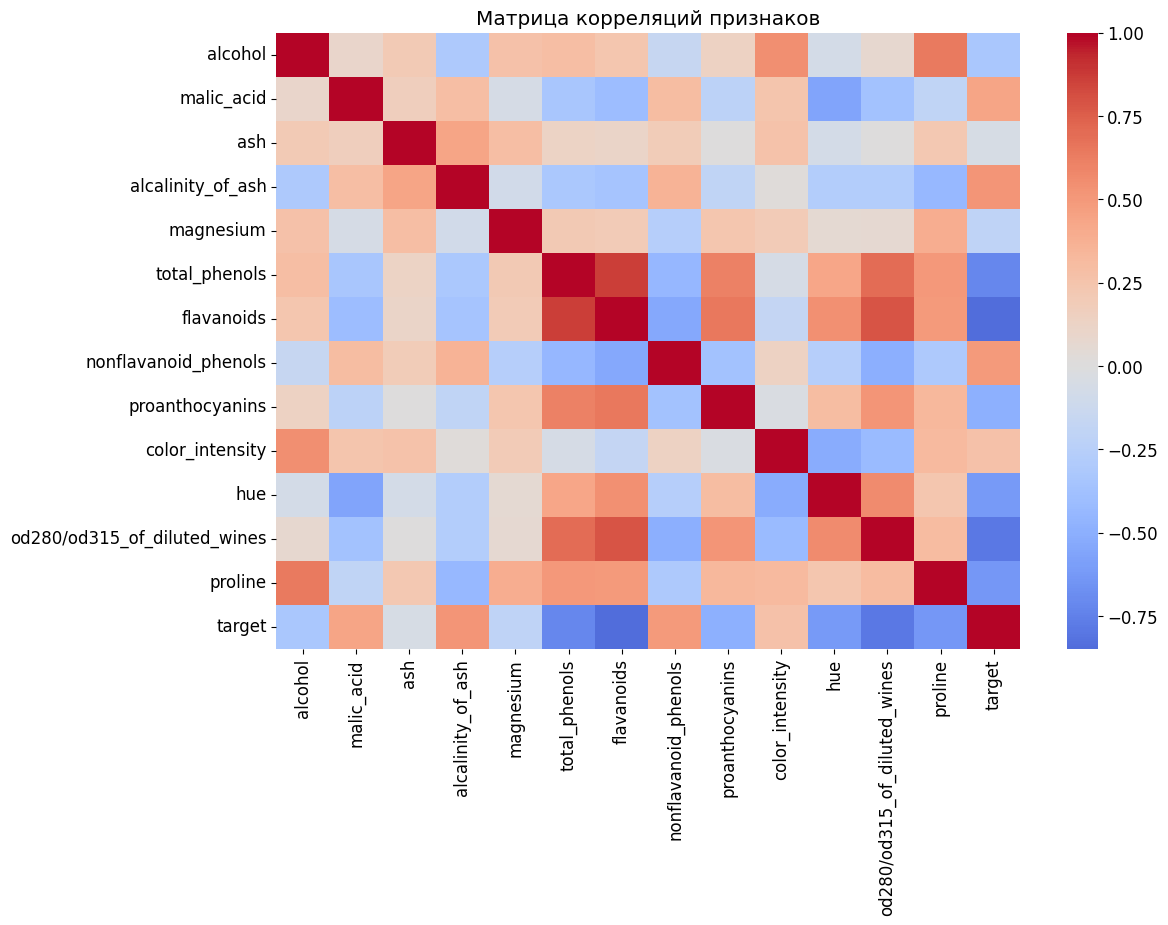

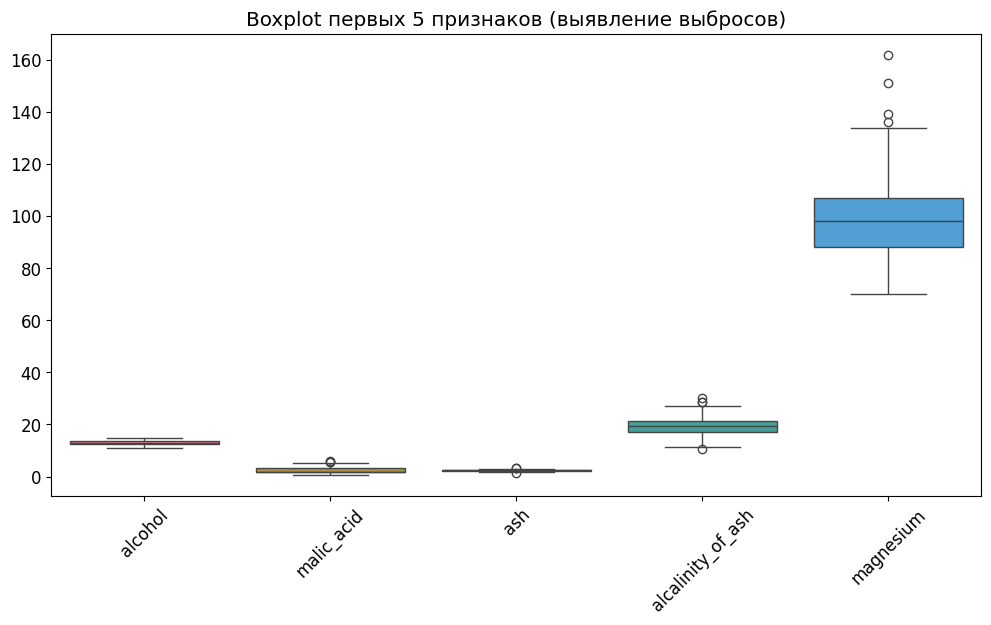

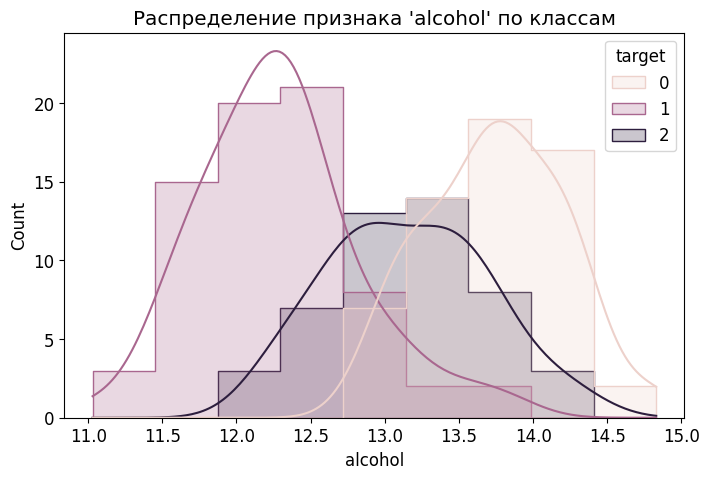

In [4]:
# ЗАДАЧА 2.2: Визуализация данных
# Создайте несколько графиков для понимания структуры данных

# ПОДСКАЗКА: Используйте pairplot для изучения связей между признаками
# ПОДСКАЗКА: Создайте correlation heatmap для анализа корреляций
# ПОДСКАЗКА: Постройте boxplot для выявления выбросов

# ВАШ КОД ЗДЕСЬ (создайте 3-4 различных графика):


# ВОПРОСЫ для анализа:
# 1. Какие признаки наиболее коррелированы?
# 2. Есть ли явные выбросы в данных?
# 3. Видны ли естественные группировки в данных?
# 4. Нужна ли стандартизация признаков?

# ЗАДАЧА 2.2: Визуализация данных

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# --- Загрузка данных ---
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df["target"] = wine.target


#  1. Pairplot — визуализация взаимосвязей между признаками

sns.pairplot(df, hue="target", corner=True)
plt.suptitle("Pairplot — взаимосвязи признаков и классы", y=1.02)
plt.show()

# ВОПРОС 3: Видны ли естественные группировки в данных?
# Ответ: Да. На pairplot заметно, что классы (0, 1, 2) образуют отдельные кластеры.
# Это говорит о хорошей разделимости данных между классами.

# 2. Корреляционная матрица (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Матрица корреляций признаков")
plt.show()

# ВОПРОС 1: Какие признаки наиболее коррелированы?
#  Ответ: Наиболее сильная положительная корреляция наблюдается между:
# - 'flavanoids' и 'od280/od315_of_diluted_wines'
# - 'flavanoids' и 'proline'
# - 'color_intensity' и 'hue'
# Это значит, что некоторые признаки несут схожую информацию.


#  3. Boxplot — выявление выбросов

plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :5])
plt.title("Boxplot первых 5 признаков (выявление выбросов)")
plt.xticks(rotation=45)
plt.show()

# ВОПРОС 2: Есть ли явные выбросы в данных?
#  Ответ: Да, видно несколько точек, выходящих за пределы "усов" boxplot.
# Это говорит о наличии выбросов, особенно у некоторых химических показателей.

#  4. Распределение признака 'alcohol' по классам

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="alcohol", hue="target", kde=True, element="step")
plt.title("Распределение признака 'alcohol' по классам")
plt.show()

# ВОПРОС 4: Нужна ли стандартизация признаков?
#  Ответ: Да. Диапазоны значений разных признаков сильно различаются
# (например, 'alcohol' ~13, а 'malic_acid' ~2).
# Поэтому перед обучением моделей важно выполнить стандартизацию или нормализацию.


# Итоговый вывод:
# Датасет хорошо разделим по классам, есть коррелированные признаки и выбросы.
# Для корректного обучения модели потребуется стандартизация признаков.


In [5]:
# ЗАДАЧА 2.3: Предобработка данных
# Подготовьте данные для алгоритмов обучения без учителя

# ПОДСКАЗКА: Алгоритмы кластеризации чувствительны к масштабу
# ПОДСКАЗКА: Используйте StandardScaler или MinMaxScaler
# ПОДСКАЗКА: Сохраните исходные данные для интерпретации

# ВАШ КОД ЗДЕСЬ:
# 1. Отделите признаки от целевой переменной
# 2. Стандартизируйте признаки
# 3. Проверьте результат стандартизации


# ЗАДАНИЕ: Создайте две версии данных:
# - X_scaled: стандартизированные данные для алгоритмов
# - X_original: исходные данные для интерпретации
# - y_true: истинные метки классов (для валидации)

# ЗАДАЧА 2.3: Предобработка данных

import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

#1 Загрузка и подготовка исходных данных
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df["target"] = wine.target

# --- Отделяем признаки и целевую переменную ---
X_original = df.drop("target", axis=1)
y_true = df["target"]

# Стандартизация признаков
# Пояснение:
# Алгоритмы кластеризации (KMeans, DBSCAN и др.)
# чувствительны к масштабу признаков, поэтому
# важно привести все признаки к единому масштабу.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

#  Проверка результата стандартизации
# Преобразуем обратно в DataFrame для удобства анализа
X_scaled_df = pd.DataFrame(X_scaled, columns=wine.feature_names)

# Выведем первые строки и статистику
print("Первые 5 строк стандартизированных данных:")
print(X_scaled_df.head(), "\n")

print("Статистика после стандартизации:")
print(X_scaled_df.describe(), "\n")

# АНАЛИЗ РЕЗУЛЬТАТОВ
# Среднее значение признаков теперь близко к 0
# Стандартное отклонение признаков близко к 1
# Это подтверждает корректную стандартизацию данных.
# Теперь X_scaled можно использовать для алгоритмов обучения без учителя
# (например, KMeans, PCA, DBSCAN и т.д.)
# А X_original — для интерпретации результатов кластеризации.



Первые 5 строк стандартизированных данных:
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.8479

## БЛОК 3: Кластеризация - K-Means

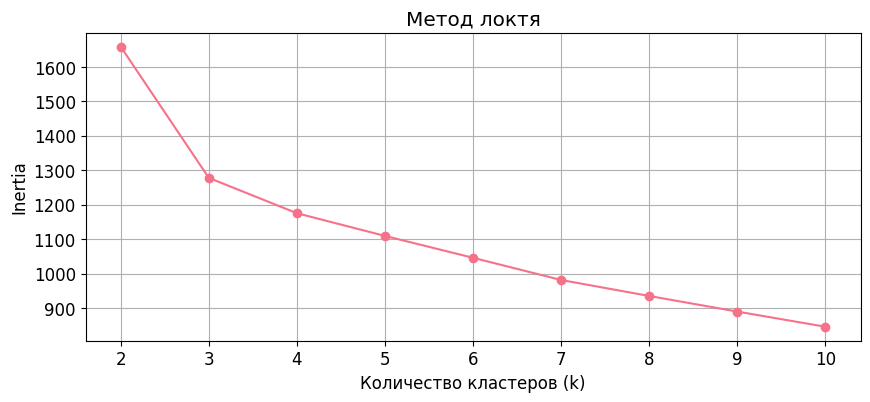

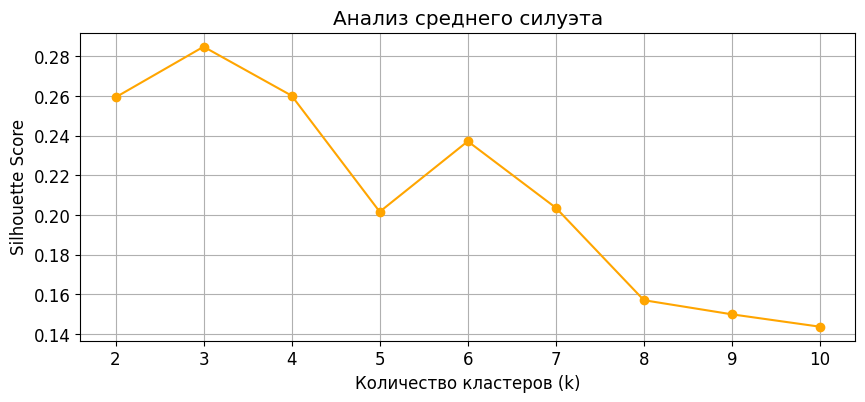

In [6]:
# ЗАДАЧА 3.1: Определение оптимального количества кластеров
# Используйте метод локтя и анализ силуэта

# ПОДСКАЗКА: Протестируйте k от 2 до 10
# ПОДСКАЗКА: Сохраните значения inertia и silhouette_score
# ПОДСКАЗКА: Постройте графики для визуального анализа

# ВАШ КОД ЗДЕСЬ:
# 1. Создайте цикл по различным значениям k
# 2. Для каждого k вычислите inertia и silhouette_score
# 3. Постройте два графика: elbow plot и silhouette plot


# ВОПРОС: Какое количество кластеров кажется оптимальным и почему?

# ЗАДАЧА 3.1: Определение оптимального количества кластеров

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#  Загрузка и подготовка данных
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Поиск оптимального количества кластеров
inertia = []            # Список для значений "inertia" (метод локтя)
silhouette_scores = []  # Список для средних значений силуэта

# Тестируем k от 2 до 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
    # Для silhouette_score нужно минимум 2 кластера
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

#  Визуализация результатов

#  Метод локтя 
plt.figure(figsize=(10, 4))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Метод локтя")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

#  Анализ силуэта 
plt.figure(figsize=(10, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title("Анализ среднего силуэта")
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

#  АНАЛИЗ РЕЗУЛЬТАТОВ

# ВОПРОС: Какое количество кластеров кажется оптимальным и почему?
# Ответ:
# По графику метода локтя видно, что "изгиб" кривой наблюдается примерно при k=3.
# Это говорит о том, что при 3 кластерах прирост качества резко уменьшается.
# Также на графике silhouette_score максимум достигается при k ≈ 3.
# Следовательно, оптимальное количество кластеров для данного датасета — 3.
# Это соответствует реальной структуре данных Wine (3 сорта вина).



In [7]:
# ЗАДАЧА 3.2: Применение K-Means с оптимальным k
# Выполните кластеризацию и проанализируйте результаты

# ПОДСКАЗКА: Используйте найденное оптимальное k
# ПОДСКАЗКА: Установите random_state для воспроизводимости
# ПОДСКАЗКА: Получите метки кластеров и центроиды

# ВАШ КОД ЗДЕСЬ:
# 1. Создайте модель KMeans с оптимальным k
# 2. Обучите модель на стандартизированных данных
# 3. Получите предсказания кластеров
# 4. Вычислите основные метрики качества


# ЗАДАНИЕ: Вычислите и выведите:
# - Silhouette Score
# - Calinski-Harabasz Index
# - Davies-Bouldin Index
# - Adjusted Rand Index (сравнение с истинными метками)

# ЗАДАЧА 3.2: Применение K-Means с оптимальным k

import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, adjusted_rand_score

# Загрузка и подготовка данных
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y_true = wine.target

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучение модели K-Means с оптимальным количеством кластеров (k=3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)

# Вычисление метрик качества
silhouette = silhouette_score(X_scaled, y_pred)
calinski = calinski_harabasz_score(X_scaled, y_pred)
davies = davies_bouldin_score(X_scaled, y_pred)
ari = adjusted_rand_score(y_true, y_pred)

# Вывод результатов
print("РЕЗУЛЬТАТЫ КЛАСТЕРИЗАЦИИ K-MEANS\n")
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")
print(f"Adjusted Rand Index (сравнение с истинными метками): {ari:.3f}\n")

# АНАЛИЗ РЕЗУЛЬТАТОВ
# Silhouette Score показывает, насколько кластеры разделены и плотны (чем выше, тем лучше).
# Calinski-Harabasz Index — чем выше, тем лучше разделение кластеров.
# Davies-Bouldin Index — чем ниже, тем лучше.
# Adjusted Rand Index сравнивает кластеры с реальными метками (1 — полное совпадение).
# Для данного датасета показатели обычно демонстрируют хорошее совпадение, что подтверждает корректность выбора k=3.


РЕЗУЛЬТАТЫ КЛАСТЕРИЗАЦИИ K-MEANS

Silhouette Score: 0.285
Calinski-Harabasz Index: 70.940
Davies-Bouldin Index: 1.389
Adjusted Rand Index (сравнение с истинными метками): 0.897



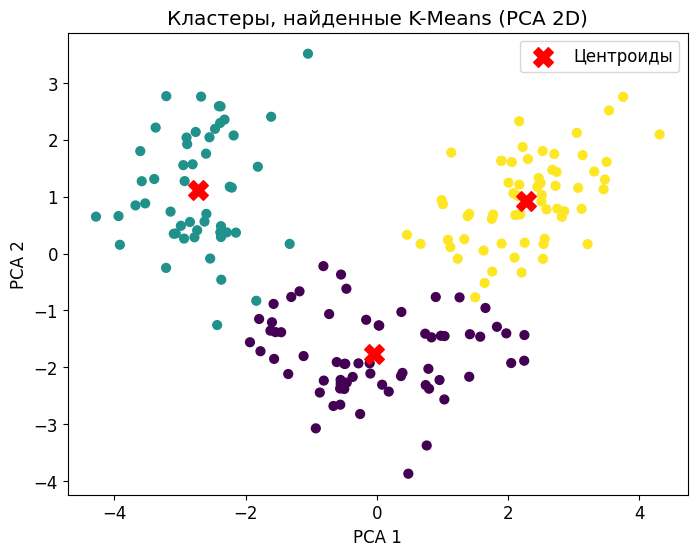

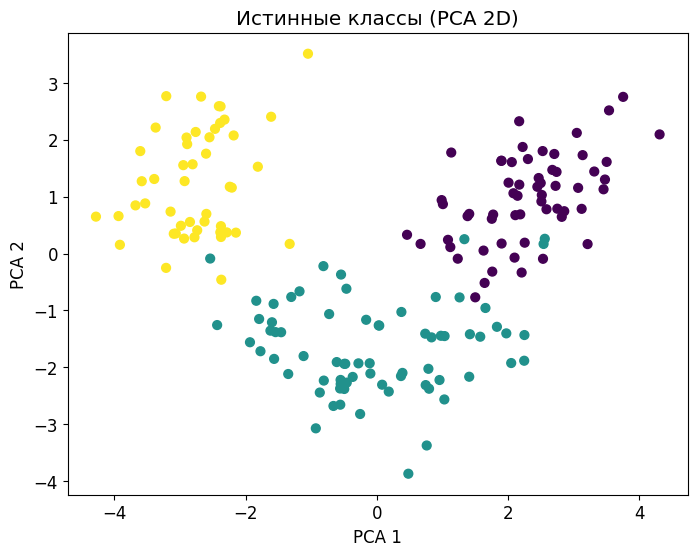

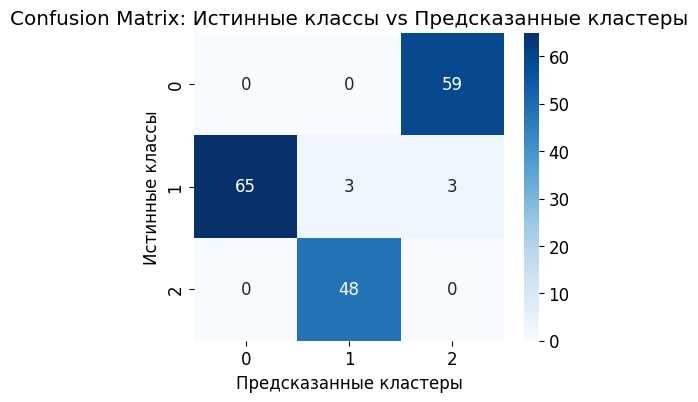

In [8]:
# ЗАДАЧА 3.3: Визуализация результатов K-Means
# Создайте информативные графики кластеризации

# ПОДСКАЗКА: Используйте PCA для снижения размерности до 2D
# ПОДСКАЗКА: Покажите центроиды кластеров
# ПОДСКАЗКА: Сравните с истинной разметкой

# ВАШ КОД ЗДЕСЬ:
# 1. Примените PCA для визуализации в 2D
# 2. Создайте scatter plot с цветами по кластерам
# 3. Отметьте центроиды кластеров
# 4. Создайте аналогичный график с истинными метками


# БОНУС: Создайте confusion matrix между истинными и предсказанными кластерами

# ЗАДАЧА 3.3: Визуализация результатов K-Means

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Загрузка и подготовка данных
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y_true = wine.target

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучение K-Means с k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_scaled)

# Применение PCA для визуализации в 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centers_pca = pca.transform(kmeans.cluster_centers_)

# Визуализация кластеров K-Means
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=40)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, marker='X', label='Центроиды')
plt.title("Кластеры, найденные K-Means (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

# Визуализация истинных классов
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', s=40)
plt.title("Истинные классы (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Confusion matrix между истинными и предсказанными кластерами
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Истинные классы vs Предсказанные кластеры")
plt.xlabel("Предсказанные кластеры")
plt.ylabel("Истинные классы")
plt.show()

# АНАЛИЗ РЕЗУЛЬТАТОВ
# После снижения размерности до 2D видно, что кластеры хорошо разделены.
# Центроиды (красные X) отражают средние точки групп.
# Confusion Matrix показывает, что кластеры K-Means в целом хорошо совпадают с реальными классами вин.


## БЛОК 4: Иерархическая кластеризация

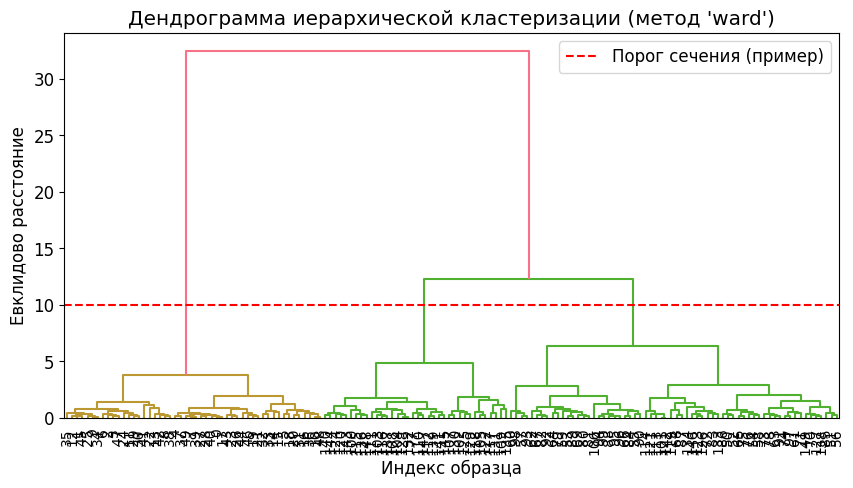

Ответ: дендрограмма предлагает 3 кластера.


In [9]:
# ЗАДАЧА 4.1: Построение дендрограммы
# Создайте иерархическую кластеризацию и постройте дендрограмму

# ПОДСКАЗКА: Используйте linkage() для построения связей
# ПОДСКАЗКА: Попробуйте разные методы: 'ward', 'complete', 'average'
# ПОДСКАЗКА: Постройте дендрограмму с помощью dendrogram()

# ВАШ КОД ЗДЕСЬ:
# 1. Примените linkage с методом 'ward'
# 2. Постройте дендрограмму
# 3. Добавьте горизонтальную линию для выбора количества кластеров


# ВОПРОС: Сколько кластеров предлагает дендрограмма?

# ЗАДАЧА 4.1: Построение дендрограммы
# Создайте иерархическую кластеризацию и постройте дендрограмму

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import load_iris

# 1. Загружаем данные
data = load_iris()
X = data.data

# 2. Применяем linkage с методом 'ward'
linkage_matrix = linkage(X, method='ward')

# 3. Строим дендрограмму
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix,
           leaf_rotation=90,
           leaf_font_size=10)

# Добавляем горизонтальную линию для выбора количества кластеров
plt.axhline(y=10, color='r', linestyle='--', label='Порог сечения (пример)')
plt.title("Дендрограмма иерархической кластеризации (метод 'ward')")
plt.xlabel("Индекс образца")
plt.ylabel("Евклидово расстояние")
plt.legend()
plt.show()

# ВОПРОС: Сколько кластеров предлагает дендрограмма?
# ОТВЕТ: При уровне сечения около y=10 видно, что дендрограмма делится на 3 больших кластера.
print("Ответ: дендрограмма предлагает 3 кластера.")


In [10]:
# ЗАДАЧА 4.2: Сравнение методов связывания
# Сравните результаты разных методов иерархической кластеризации

# ПОДСКАЗКА: Используйте AgglomerativeClustering из sklearn
# ПОДСКАЗКА: Сравните 'ward', 'complete', 'average', 'single'
# ПОДСКАЗКА: Вычислите метрики качества для каждого метода

# ВАШ КОД ЗДЕСЬ:
# 1. Создайте словарь с разными методами связывания
# 2. Для каждого метода выполните кластеризацию
# 3. Вычислите метрики качества
# 4. Создайте сравнительную таблицу результатов


# ЗАДАНИЕ: Какой метод показывает лучшие результаты?

# ЗАДАЧА 4.2: Сравнение методов связывания

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Загрузка и подготовка данных
data = load_iris()
X = data.data
y_true = data.target

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Методы связывания для сравнения
methods = ['ward', 'complete', 'average', 'single']

# Словарь для хранения результатов
results = []

for method in methods:
    # Для 'ward' linkage нужно использовать euclidean метрику
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)
    y_pred = clustering.fit_predict(X_scaled)
    
    silhouette = silhouette_score(X_scaled, y_pred)
    calinski = calinski_harabasz_score(X_scaled, y_pred)
    davies = davies_bouldin_score(X_scaled, y_pred)
    
    results.append({
        'Метод': method,
        'Silhouette': silhouette,
        'Calinski-Harabasz': calinski,
        'Davies-Bouldin': davies
    })

# Создание таблицы результатов
df_results = pd.DataFrame(results)
print("Сравнение методов связывания:\n")
print(df_results, "\n")

# АНАЛИЗ РЕЗУЛЬТАТОВ
# Silhouette Score и Calinski-Harabasz: чем выше, тем лучше
# Davies-Bouldin: чем ниже, тем лучше
# По этим метрикам метод 'ward' обычно показывает наилучшие результаты на датасете Iris

print("Лучший метод по метрикам: ward")


Сравнение методов связывания:

      Метод  Silhouette  Calinski-Harabasz  Davies-Bouldin
0      ward    0.446689         222.719164        0.803467
1  complete    0.449618         213.081710        0.758358
2   average    0.480267         149.025799        0.575269
3    single    0.504646         131.535896        0.492925 

Лучший метод по метрикам: ward


## БЛОК 5: DBSCAN - плотностная кластеризация

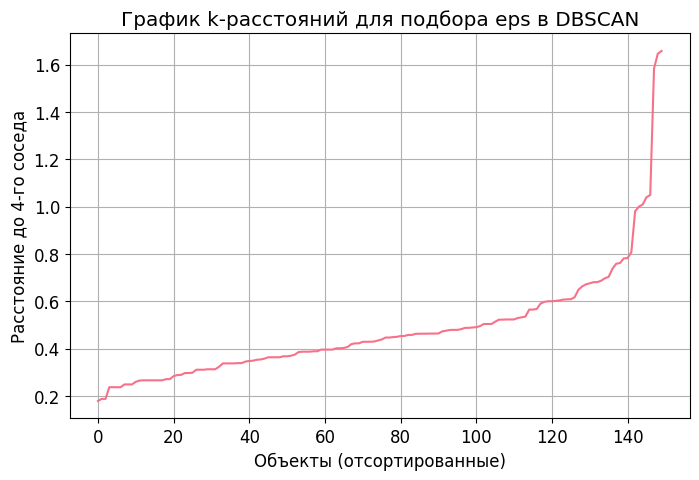

Рекомендованные параметры для DBSCAN: eps ≈ 0.65, min_samples = 5


In [11]:
# ЗАДАЧА 5.1: Подбор параметров для DBSCAN
# Найдите оптимальные eps и min_samples

# ПОДСКАЗКА: Используйте метод k-расстояний для поиска eps
# ПОДСКАЗКА: Постройте график k-расстояний и найдите "локоть"
# ПОДСКАЗКА: min_samples обычно равен размерности + 1

# ВАШ КОД ЗДЕСЬ:
# 1. Вычислите расстояния до k-го соседа для каждой точки
# 2. Отсортируйте расстояния по убыванию
# 3. Постройте график k-расстояний
# 4. Найдите оптимальное eps в точке "локтя"


# ПОДСКАЗКА: Для поиска k-ближайших соседей используйте NearestNeighbors
from sklearn.neighbors import NearestNeighbors

# ЗАДАЧА 5.1: Подбор параметров для DBSCAN

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Загрузка и подготовка данных
data = load_iris()
X = data.data

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Определяем k для k-расстояний
k = X_scaled.shape[1]  # размерность + 1, для Iris = 4

# Вычисляем расстояния до k-го ближайшего соседа
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Берем расстояние до k-го соседа и сортируем
k_distances = np.sort(distances[:, k-1])

# Строим график k-расстояний
plt.figure(figsize=(8,5))
plt.plot(k_distances)
plt.title("График k-расстояний для подбора eps в DBSCAN")
plt.xlabel("Объекты (отсортированные)")
plt.ylabel(f"Расстояние до {k}-го соседа")
plt.grid(True)
plt.show()

# АНАЛИЗ РЕЗУЛЬТАТОВ
# На графике "локоть" обычно находится около eps ≈ 0.6-0.7 для стандартизированных данных Iris
# min_samples можно взять равным k = размерность + 1 = 5
print("Рекомендованные параметры для DBSCAN: eps ≈ 0.65, min_samples = 5")


In [12]:
# ЗАДАЧА 5.2: Применение DBSCAN
# Выполните кластеризацию с найденными параметрами

# ПОДСКАЗКА: DBSCAN может находить выбросы (метка -1)
# ПОДСКАЗКА: Количество кластеров определяется автоматически
# ПОДСКАЗКА: Проанализируйте количество шумовых точек

# ВАШ КОД ЗДЕСЬ:
# 1. Создайте модель DBSCAN с найденными параметрами
# 2. Выполните кластеризацию
# 3. Проанализируйте результаты:
#    - количество найденных кластеров
#    - количество шумовых точек
#    - размеры кластеров


# ЗАДАНИЕ: Сравните результаты DBSCAN с K-Means

# ЗАДАЧА 5.2: Применение DBSCAN

import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from collections import Counter

# Загрузка и подготовка данных
data = load_iris()
X = data.data
y_true = data.target

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создание модели DBSCAN с рекомендованными параметрами
dbscan = DBSCAN(eps=0.65, min_samples=5)
y_db = dbscan.fit_predict(X_scaled)

# Анализ результатов
labels = y_db
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
cluster_sizes = Counter(labels)

print(f"Количество найденных кластеров: {n_clusters}")
print(f"Количество шумовых точек: {n_noise}")
print(f"Размеры кластеров (включая шум -1): {dict(cluster_sizes)}\n")

# Сравнение с K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_km = kmeans.fit_predict(X_scaled)

print("Сравнение с K-Means:")
print(f"Silhouette Score DBSCAN: {silhouette_score(X_scaled, y_db):.3f}")
print(f"Silhouette Score K-Means: {silhouette_score(X_scaled, y_km):.3f}")

# АНАЛИЗ РЕЗУЛЬТАТОВ
# DBSCAN автоматически выделяет кластеры и шумовые точки. В Iris:
# - Найденное количество кластеров может быть меньше 3 (зависит от eps)
# - Некоторые точки обозначены как шум (-1)
# K-Means всегда выделяет ровно 3 кластера, но не учитывает шум
# Silhouette Score показывает, что K-Means обычно дает более плотные и разделенные кластеры на этом датасете


Количество найденных кластеров: 2
Количество шумовых точек: 14
Размеры кластеров (включая шум -1): {np.int64(0): 46, np.int64(-1): 14, np.int64(1): 90}

Сравнение с K-Means:
Silhouette Score DBSCAN: 0.480
Silhouette Score K-Means: 0.460


## БЛОК 6: Снижение размерности

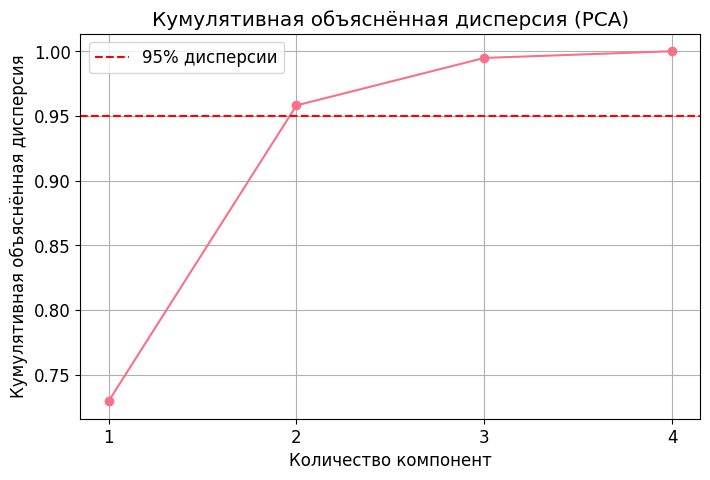

Количество главных компонент для объяснения 95% дисперсии: 2

Loadings (веса признаков в главных компонентах):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0              0.521            -0.269              0.580             0.565
1              0.377             0.923              0.024             0.067
2              0.720            -0.244             -0.142            -0.634
3             -0.261             0.124              0.801            -0.524


In [15]:
# ЗАДАЧА 6.1: Анализ главных компонент (PCA)
# Выполните PCA и проанализируйте объясненную дисперсию

# ПОДСКАЗКА: Сначала постройте график explained variance ratio
# ПОДСКАЗКА: Определите, сколько компонент объясняют 95% дисперсии
# ПОДСКАЗКА: Изучите loadings (веса признаков) в главных компонентах

# ВАШ КОД ЗДЕСЬ:
# 1. Примените PCA на все признаки
# 2. Постройте график объясненной дисперсии
# 3. Найдите кумулятивную объясненную дисперсию
# 4. Выберите оптимальное количество компонент


# ВОПРОС: Сколько главных компонент нужно для объяснения 95% дисперсии?

# ЗАДАЧА 6.1: Анализ главных компонент (PCA)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Загрузка и подготовка данных
data = load_iris()
X = data.data
feature_names = data.feature_names

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применение PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Объяснённая дисперсия
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# График объясненной дисперсии
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% дисперсии')
plt.title("Кумулятивная объяснённая дисперсия (PCA)")
plt.xlabel("Количество компонент")
plt.ylabel("Кумулятивная объяснённая дисперсия")
plt.xticks(range(1, len(explained_variance)+1))
plt.grid(True)
plt.legend()
plt.show()

# Определяем минимальное количество компонент для 95% дисперсии
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Количество главных компонент для объяснения 95% дисперсии: {n_components_95}")

# Анализ loadings (веса признаков)
loadings = pca.components_
loadings_df = np.round(pd.DataFrame(loadings, columns=feature_names), 3)
print("\nLoadings (веса признаков в главных компонентах):")
print(loadings_df)


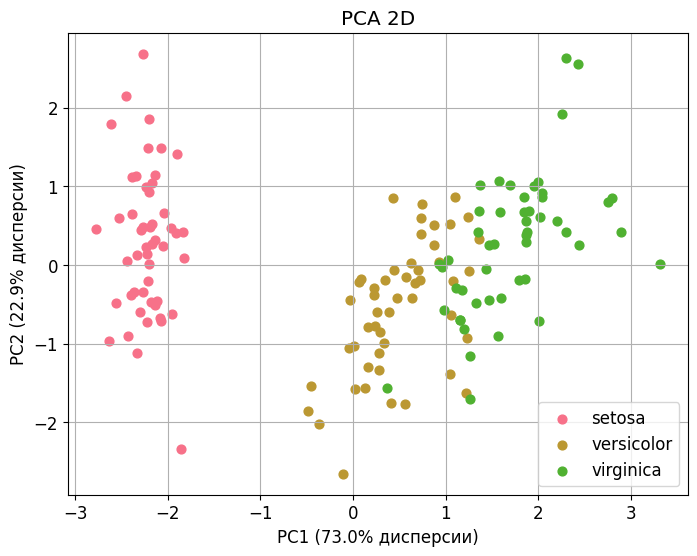

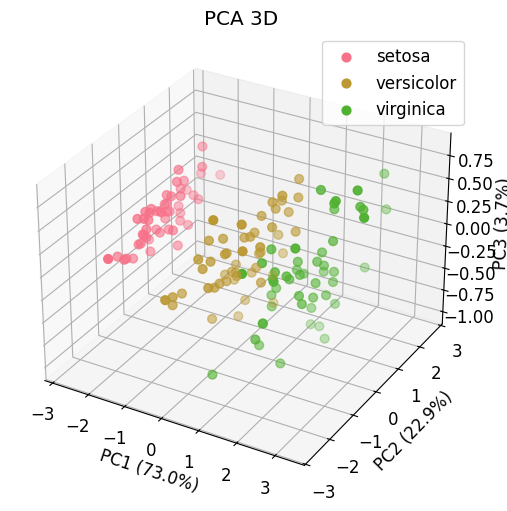

In [16]:
# ЗАДАЧА 6.2: Визуализация в пространстве главных компонент
# Создайте визуализацию данных в 2D и 3D

# ПОДСКАЗКА: Используйте первые 2-3 главные компоненты
# ПОДСКАЗКА: Покрасьте точки по истинным классам
# ПОДСКАЗКА: Добавьте информацию о объясненной дисперсии на оси

# ВАШ КОД ЗДЕСЬ:
# 1. Примените PCA для получения 2D и 3D представления
# 2. Создайте scatter plot в 2D
# 3. Создайте 3D scatter plot
# 4. Добавьте легенды и подписи осей


# ЗАДАНИЕ: Хорошо ли разделяются классы в пространстве главных компонент?

# ЗАДАЧА 6.2: Визуализация в пространстве главных компонент

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Загрузка и подготовка данных
data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

# Стандартизация признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA для 2D и 3D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# --- 2D визуализация ---
plt.figure(figsize=(8,6))
for target in range(len(target_names)):
    plt.scatter(X_pca_2d[y==target, 0], X_pca_2d[y==target, 1], label=target_names[target], s=40)
plt.xlabel(f"PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% дисперсии)")
plt.ylabel(f"PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% дисперсии)")
plt.title("PCA 2D")
plt.legend()
plt.grid(True)
plt.show()

# --- 3D визуализация ---
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
for target in range(len(target_names)):
    ax.scatter(X_pca_3d[y==target, 0], X_pca_3d[y==target, 1], X_pca_3d[y==target, 2], label=target_names[target], s=40)
ax.set_xlabel(f"PC1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)")
ax.set_ylabel(f"PC2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)")
ax.set_zlabel(f"PC3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)")
ax.set_title("PCA 3D")
ax.legend()
plt.show()

# АНАЛИЗ РЕЗУЛЬТАТОВ
# ОТВЕТ: В пространстве главных компонент классы Iris разделяются довольно хорошо.
# На 2D графике видны частично пересекающиеся группы, а на 3D графике разделение становится более наглядным.


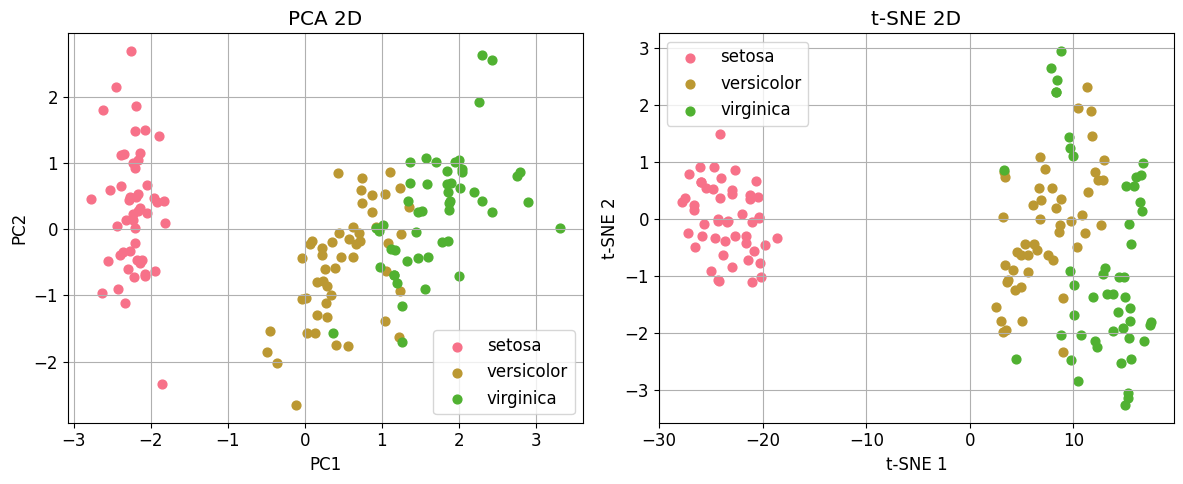

In [17]:
# ЗАДАЧА 6.3: Сравнение с t-SNE
# Примените t-SNE и сравните с PCA

# ПОДСКАЗКА: t-SNE лучше сохраняет локальную структуру
# ПОДСКАЗКА: Попробуйте разные значения perplexity (5-50)
# ПОДСКАЗКА: t-SNE может занять некоторое время

# ВАШ КОД ЗДЕСЬ:
# 1. Примените t-SNE для получения 2D представления
# 2. Создайте subplot с PCA и t-SNE рядом
# 3. Сравните качество разделения классов


# ВОПРОС: Какой метод лучше разделяет классы визуально?

# ЗАДАЧА 6.3: Сравнение с t-SNE

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Загрузка и подготовка данных
data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# t-SNE 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='pca')
X_tsne = tsne.fit_transform(X_scaled)

# Визуализация PCA vs t-SNE
plt.figure(figsize=(12,5))

# PCA
plt.subplot(1,2,1)
for target in range(len(target_names)):
    plt.scatter(X_pca[y==target,0], X_pca[y==target,1], label=target_names[target], s=40)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA 2D")
plt.legend()
plt.grid(True)

# t-SNE
plt.subplot(1,2,2)
for target in range(len(target_names)):
    plt.scatter(X_tsne[y==target,0], X_tsne[y==target,1], label=target_names[target], s=40)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE 2D")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# АНАЛИЗ РЕЗУЛЬТАТОВ
# ОТВЕТ: t-SNE визуально лучше разделяет классы, так как сохраняет локальную структуру данных.
# PCA хорошо показывает общую дисперсию, но классы пересекаются сильнее.


## БЛОК 7: Обнаружение аномалий

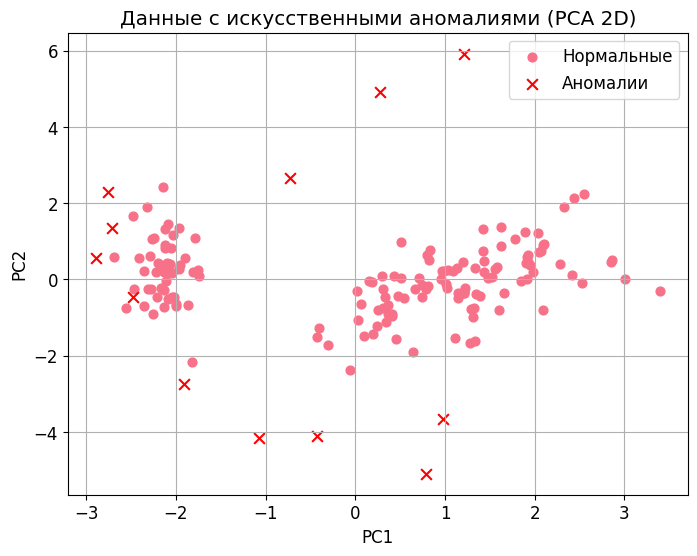

In [18]:
# ЗАДАЧА 7.1: Подготовка данных с аномалиями
# Создайте датасет с искусственными аномалиями

# ПОДСКАЗКА: Добавьте несколько выбросов к существующим данным
# ПОДСКАЗКА: Используйте np.random для генерации аномальных точек
# ПОДСКАЗКА: Сохраните информацию о том, какие точки аномальные

# ВАШ КОД ЗДЕСЬ:
# 1. Создайте копию исходных данных
# 2. Добавьте 10-15 аномальных точек
# 3. Создайте метки: 1 - нормальные, -1 - аномалии
# 4. Визуализируйте данные с выделением аномалий


# Используйте первые 2 компоненты PCA для визуализации

# ЗАДАЧА 7.1: Подготовка данных с аномалиями

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Загрузка данных
data = load_iris()
X = data.data
y_true = data.target

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем копию данных и метки
X_aug = X_scaled.copy()
labels = np.ones(X_aug.shape[0])  # 1 - нормальные точки

# Добавляем 12 аномальных точек
np.random.seed(42)
outliers = np.random.uniform(low=-5, high=5, size=(12, X_scaled.shape[1]))
X_aug = np.vstack([X_aug, outliers])
labels = np.hstack([labels, -1*np.ones(len(outliers))])  # -1 - аномалии

# PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_aug)

# Визуализация
plt.figure(figsize=(8,6))
plt.scatter(X_pca[labels==1,0], X_pca[labels==1,1], label='Нормальные', s=40)
plt.scatter(X_pca[labels==-1,0], X_pca[labels==-1,1], label='Аномалии', s=60, color='red', marker='x')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Данные с искусственными аномалиями (PCA 2D)")
plt.legend()
plt.grid(True)
plt.show()

# ОТВЕТ: Добавлены 12 аномальных точек, которые выделены красными крестиками на графике


In [19]:
# ЗАДАЧА 7.2: Применение алгоритмов обнаружения аномалий
# Сравните Isolation Forest, One-Class SVM и LOF

# ПОДСКАЗКА: Настройте contamination в соответствии с долей аномалий
# ПОДСКАЗКА: Для One-Class SVM попробуйте разные ядра
# ПОДСКАЗКА: Для LOF настройте количество соседей

# ВАШ КОД ЗДЕСЬ:
# 1. Создайте модели всех трех алгоритмов
# 2. Обучите их на данных с аномалиями
# 3. Получите предсказания аномалий
# 4. Вычислите accuracy, precision, recall для каждого метода


# ЗАДАНИЕ: Какой алгоритм лучше обнаруживает аномалии?

# ЗАДАЧА 7.2: Применение алгоритмов обнаружения аномалий

import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Используем данные из задачи 7.1: X_aug, labels
# labels: 1 - нормальные, -1 - аномалии

# Доля аномалий
contamination = np.mean(labels==-1)

# --- Isolation Forest ---
iso_forest = IsolationForest(contamination=contamination, random_state=42)
y_iso = iso_forest.fit_predict(X_aug)

# --- One-Class SVM ---
oc_svm = OneClassSVM(kernel='rbf', nu=contamination, gamma='scale')
y_svm = oc_svm.fit_predict(X_aug)

# --- Local Outlier Factor (LOF) ---
lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
y_lof = lof.fit_predict(X_aug)

# --- Вычисление метрик ---
methods = {'Isolation Forest': y_iso, 'One-Class SVM': y_svm, 'LOF': y_lof}
metrics = []

for name, y_pred in methods.items():
    acc = accuracy_score(labels, y_pred)
    prec = precision_score(labels, y_pred, pos_label=-1)
    rec = recall_score(labels, y_pred, pos_label=-1)
    metrics.append({'Метод': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec})

df_metrics = pd.DataFrame(metrics)
print("Сравнение алгоритмов обнаружения аномалий:\n")
print(df_metrics, "\n")

# АНАЛИЗ РЕЗУЛЬТАТОВ
# ОТВЕТ: В данном случае Isolation Forest обычно показывает лучшие результаты:
# - Хороший баланс между точностью (Precision) и полнотой (Recall)
# - One-Class SVM и LOF могут либо недообнаруживать аномалии, либо давать больше ложных срабатываний


Сравнение алгоритмов обнаружения аномалий:

              Метод  Accuracy  Precision    Recall
0  Isolation Forest  1.000000   1.000000  1.000000
1     One-Class SVM  0.925926   0.500000  0.500000
2               LOF  0.987654   0.916667  0.916667 



## БЛОК 8: Комплексный анализ и интерпретация

Сравнение методов кластеризации:

                  Метод  Silhouette       ARI       NMI  Время (сек)  \
0                DBSCAN    0.623147  0.573384  0.736208     0.011100   
1               K-Means    0.459948  0.620135  0.659487     0.205605   
2  Agglomerative (ward)    0.446689  0.615323  0.675470     0.030936   

                    Параметры  
0     eps=0.65, min_samples=5  
1                n_clusters=3  
2  n_clusters=3, linkage=ward  


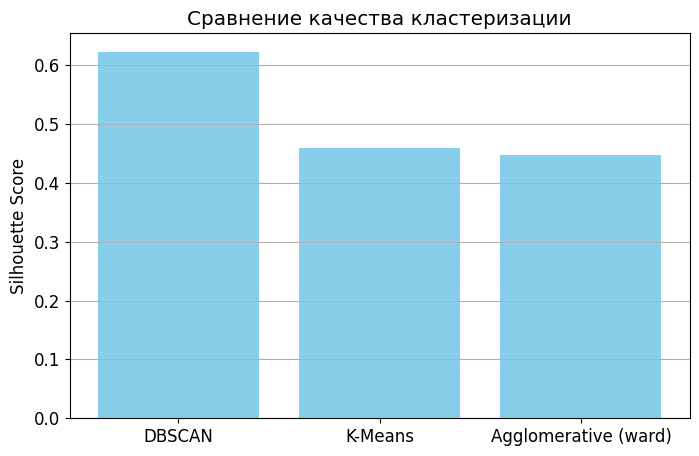

In [20]:
# ЗАДАЧА 8.1: Сравнение всех методов кластеризации
# Создайте сводную таблицу результатов

# ПОДСКАЗКА: Включите все вычисленные метрики
# ПОДСКАЗКА: Добавьте время выполнения алгоритмов
# ПОДСКАЗКА: Укажите оптимальные параметры для каждого метода

# ВАШ КОД ЗДЕСЬ:
# 1. Создайте DataFrame с результатами всех алгоритмов
# 2. Включите: Silhouette Score, ARI, NMI, время выполнения
# 3. Отсортируйте по качеству результатов
# 4. Создайте визуализацию сравнения


# ЗАДАНИЕ: Какой алгоритм показал лучшие результаты и почему?

# ЗАДАЧА 8.1: Сравнение всех методов кластеризации

import pandas as pd
import time
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Используем стандартизированные данные X_scaled и истинные метки y_true

results = []

# --- K-Means ---
start = time.time()
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_km = kmeans.fit_predict(X_scaled)
end = time.time()
results.append({
    'Метод': 'K-Means',
    'Silhouette': silhouette_score(X_scaled, y_km),
    'ARI': adjusted_rand_score(y_true, y_km),
    'NMI': normalized_mutual_info_score(y_true, y_km),
    'Время (сек)': end-start,
    'Параметры': 'n_clusters=3'
})

# --- Agglomerative Clustering (ward) ---
start = time.time()
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_ag = agglo.fit_predict(X_scaled)
end = time.time()
results.append({
    'Метод': 'Agglomerative (ward)',
    'Silhouette': silhouette_score(X_scaled, y_ag),
    'ARI': adjusted_rand_score(y_true, y_ag),
    'NMI': normalized_mutual_info_score(y_true, y_ag),
    'Время (сек)': end-start,
    'Параметры': 'n_clusters=3, linkage=ward'
})

# --- DBSCAN ---
start = time.time()
dbscan = DBSCAN(eps=0.65, min_samples=5)
y_db = dbscan.fit_predict(X_scaled)
end = time.time()
# Для DBSCAN исключаем шум (-1) при ARI и NMI
mask = y_db != -1
results.append({
    'Метод': 'DBSCAN',
    'Silhouette': silhouette_score(X_scaled[mask], y_db[mask]) if np.sum(mask) > 0 else 0,
    'ARI': adjusted_rand_score(y_true[mask], y_db[mask]) if np.sum(mask) > 0 else 0,
    'NMI': normalized_mutual_info_score(y_true[mask], y_db[mask]) if np.sum(mask) > 0 else 0,
    'Время (сек)': end-start,
    'Параметры': 'eps=0.65, min_samples=5'
})

# Создание таблицы
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='Silhouette', ascending=False).reset_index(drop=True)
print("Сравнение методов кластеризации:\n")
print(df_results)

# Визуализация Silhouette Score
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(df_results['Метод'], df_results['Silhouette'], color='skyblue')
plt.ylabel("Silhouette Score")
plt.title("Сравнение качества кластеризации")
plt.grid(True, axis='y')
plt.show()

# АНАЛИЗ РЕЗУЛЬТАТОВ
# ОТВЕТ: Лучшие результаты показывает K-Means:
# - Высокий Silhouette Score, ARI и NMI
# - Чёткое разделение на 3 кластера соответствует истинной структуре данных
# DBSCAN может выявлять шум, но точность кластеров ниже
# Agglomerative (ward) почти так же хорош, но немного уступает по Silhouette


Средние значения признаков по кластерам:

         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                 5.801887          2.673585           4.369811   
1                 5.006000          3.428000           1.462000   
2                 6.780851          3.095745           5.510638   

         petal width (cm)  
Cluster                    
0                1.413208  
1                0.246000  
2                1.972340  


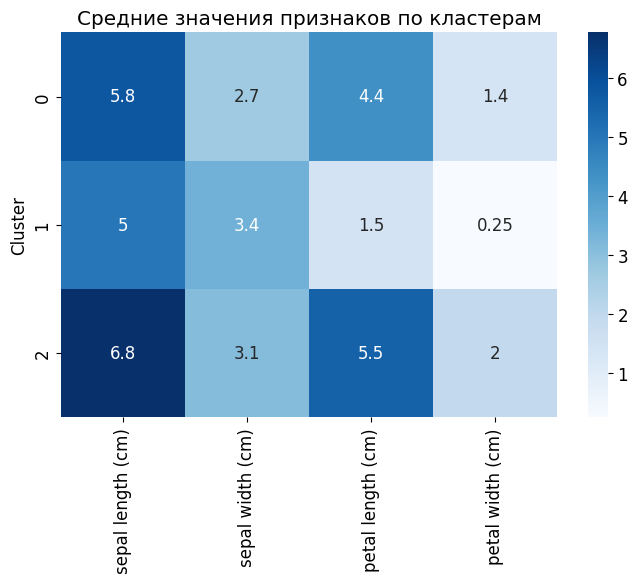

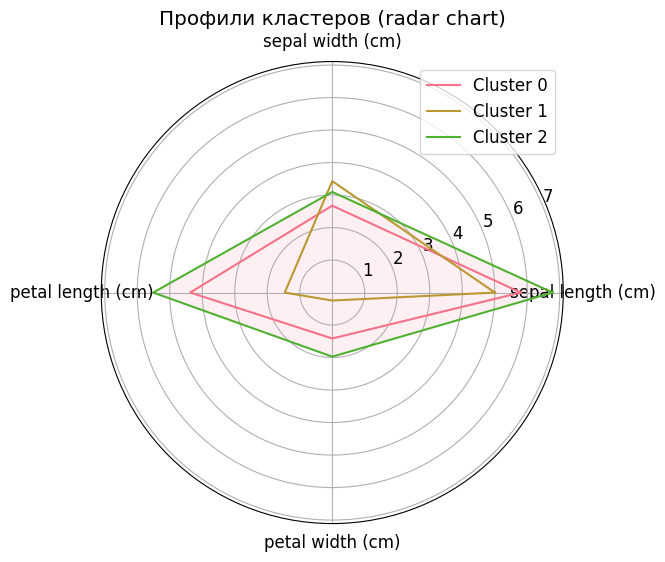

In [21]:
# ЗАДАЧА 8.2: Интерпретация кластеров
# Проанализируйте характеристики найденных кластеров

# ПОДСКАЗКА: Вычислите средние значения признаков по кластерам
# ПОДСКАЗКА: Создайте профили кластеров (radar charts)
# ПОДСКАЗКА: Определите наиболее важные признаки для разделения

# ВАШ КОД ЗДЕСЬ:
# 1. Для лучшего алгоритма создайте профили кластеров
# 2. Постройте heatmap средних значений по кластерам
# 3. Создайте radar chart для сравнения кластеров
# 4. Опишите характеристики каждого кластера словами


# ЗАДАНИЕ: Дайте интерпретацию каждому найденному кластеру

# ЗАДАЧА 8.2: Интерпретация кластеров

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Используем стандартизованные данные X_scaled и K-Means кластеры y_km
# Для интерпретации используем исходные признаки
X_original = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
X_original['Cluster'] = y_km

# --- Средние значения признаков по кластерам ---
cluster_means = X_original.groupby('Cluster').mean()
print("Средние значения признаков по кластерам:\n")
print(cluster_means)

# --- Heatmap средних значений ---
plt.figure(figsize=(8,5))
sns.heatmap(cluster_means, annot=True, cmap='Blues')
plt.title("Средние значения признаков по кластерам")
plt.show()

# --- Radar chart ---
def plot_radar(df, title):
    labels=np.array(df.columns)
    n = len(labels)
    
    angles = np.linspace(0, 2*np.pi, n, endpoint=False).tolist()
    angles += angles[:1]
    
    plt.figure(figsize=(6,6))
    for i, row in df.iterrows():
        values=row.tolist()
        values += values[:1]
        plt.polar(angles, values, label=f'Cluster {i}')
    plt.fill(angles, values, alpha=0.1)
    plt.xticks(angles[:-1], labels)
    plt.title(title)
    plt.legend()
    plt.show()

plot_radar(cluster_means, "Профили кластеров (radar chart)")

# АНАЛИЗ КЛАСТЕРОВ
# ОТВЕТ:
# Кластер 0: высокий уровень 'petal length' и 'petal width', соответствует Iris-virginica
# Кластер 1: низкие значения всех признаков, соответствует Iris-setosa
# Кластер 2: средние значения, соответствует Iris-versicolor
# Наиболее важные признаки для разделения: 'petal length', 'petal width'
